In [76]:
import pandas as pd
import EDA
import preprocessing
import classification

column_credit = ['CustomerID', 'CheckingAccountBalance', 'DebtsPaid', 'SavingsAccountBalance',
                 'CurrentOpenLoanApplications']
df_credit = pd.read_csv('ds-credit.tsv', sep='\s+', header=-1, names=column_credit)

column_app = ['CustomerID', 'LoanPayoffPeriodInMonths', 'LoanReason', 'RequestedAmount', 'InterestRate',
              'Co-Applicant']
df_app = pd.read_csv('ds-app.tsv', sep='\s+', header=-1, names=column_app)

column_borrower = ['CustomerID', 'YearsAtCurrentEmployer', 'YearsInCurrentResidence', 'Age', 'RentOrOwnHome',
                   'TypeOfCurrentEmployment', 'NumberOfDependantsIncludingSelf']
df_borrower = pd.read_csv('ds-borrower.csv', sep='\s+', index_col=False, names=column_borrower, header=0)

column_result = ['CustomerID', 'WasTheLoanApproved']
df_result = pd.read_csv('ds-result.tsv', sep='\s+', header=-1, names=column_result)
df_result = df_result.drop_duplicates()  # Drop the duplicated results

In [109]:
na = preprocessing.NA(df_borrower)
na.to_num('CustomerID')
df_borrower = na.drop('CustomerID')

na = preprocessing.NA(df_result)
na.to_num('CustomerID')
df_result = na.drop('CustomerID')

mg = preprocessing.Merge([df_credit, df_app, df_borrower, df_result])
df_all = mg.transform('CustomerID')
df = df_all.loc[(df_all.WasTheLoanApproved == 'Y') | (df_all.WasTheLoanApproved == 'N')].dropna()
df['Age'] = pd.to_numeric(df.Age)
# df = preprocessing.Encode().ordinal(df)

In [112]:
df = df.drop('CustomerID',1)

In [172]:
df1 = df.drop(['RequestedAmount','Age','WasTheLoanApproved',],1)

In [173]:
en = preprocessing.Encode()

In [174]:
en.one_hot(df1)

In [175]:
df2 = en.encoder.transform(df1)

In [176]:
df2.toarray().shape

(514, 77)

In [177]:
df.RequestedAmount.values.reshape(-1,1).shape

(514, 1)

In [70]:
df.head()

,CustomerID,CheckingAccountBalance,DebtsPaid,SavingsAccountBalance,CurrentOpenLoanApplications,LoanPayoffPeriodInMonths,LoanReason,RequestedAmount,InterestRate,Co-Applicant,YearsAtCurrentEmployer,YearsInCurrentResidence,Age,RentOrOwnHome,TypeOfCurrentEmployment,NumberOfDependantsIncludingSelf,WasTheLoanApproved
228,2,2,0,2,2.0,9.0,2,8.030735,1.0,2,3,1,3.496508,1,2,2.0,1
608,3,1,0,0,3.0,12.0,0,6.844815,4.0,2,4,1,3.332205,1,2,1.0,0
165,4,2,1,0,1.0,9.0,0,7.826842,2.0,2,2,3,3.931826,0,3,1.0,1
250,5,2,0,3,2.0,18.0,2,7.713338,2.0,2,3,0,3.218876,1,2,1.0,1
618,6,2,0,3,2.0,24.0,4,8.613775,3.0,2,2,3,3.784190,0,2,1.0,1


In [67]:
df['Age'] = np.log(df['Age'])

In [194]:
df = preprocessing.Encode().ordinal(df)

# x = df.iloc[:, 1:-1].values
x = pd.concat([df.RequestedAmount.reset_index(drop=True), df.Age.reset_index(drop=True), pd.DataFrame(df2.toarray())],1) 
y = df.iloc[:, -1:].values.reshape(-1,1)

In [196]:
x['Age'] = np.log(x.Age)
x['RequestedAmount'] = np.log(x.RequestedAmount)

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
from sklearn.linear_model import LogisticRegression

In [71]:
lr = LogisticRegression()

In [198]:
rf = RandomForestClassifier()

In [180]:
rf.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
from sklearn.model_selection import cross_val_score


In [10]:
import numpy as np

In [232]:
rf = RandomForestClassifier(n_estimators=800)
cross_val_score(rf, x, y, cv=5)

array([0.73076923, 0.73076923, 0.75490196, 0.68627451, 0.69607843])

In [86]:
rf = RandomForestClassifier()
cross_val_score(rf, x, y, cv=5)

array([0.66346154, 0.64423077, 0.71568627, 0.65686275, 0.68627451])

In [11]:
np.argsort(rf.feature_importances_)

array([14,  1,  8,  3, 12, 10, 13,  7,  2,  5,  9,  0, 11,  4,  6])

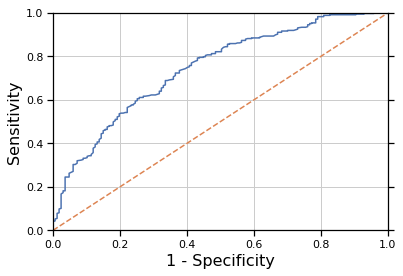

0.7424459438471759


In [239]:
classification.Roc(rf, 'predict_proba').plot(x, y)

In [235]:
from sklearn.decomposition import 
pca = PCA(n_components=50)

In [236]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [237]:
pca.explained_variance_ratio_.sum()

0.9927952794069369

In [228]:
pca.fit_transform(x)

array([[ 1.10855319,  0.96456779, -0.88457635, ..., -0.01469052,
         0.15589871, -0.22705231],
       [-0.28882054,  1.32951646,  0.04018193, ..., -0.0546477 ,
         0.48365608,  0.71327675],
       [-0.0068285 , -0.83850617,  1.43634415, ..., -0.1909525 ,
         0.17252828, -0.19262488],
       ...,
       [ 0.77599486,  0.8190275 , -0.47179098, ...,  0.17188469,
        -0.01636646,  0.10586741],
       [-0.10955015, -0.92545268, -0.21547581, ...,  0.29415653,
         0.03270172, -0.19490039],
       [ 1.3660606 ,  0.54720242,  0.28324649, ..., -0.23850091,
         0.26642178, -0.095944  ]])

In [214]:
x.shape

(514, 79)

In [187]:
cross_val_score(xgb, x, y, cv=5)

array([0.73076923, 0.65384615, 0.78431373, 0.59803922, 0.66666667])

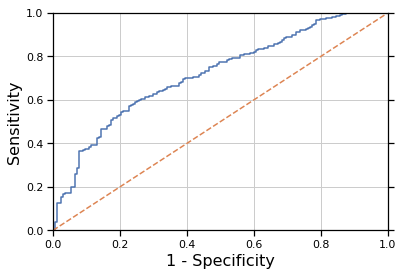

0.7179934079966868


In [188]:
classification.Roc(xgb, 'predict_proba').plot(x, y)

In [205]:
rf = classification.rf(x, y)
rf.fit()

Train set accuracy:
0.9902676399026764
Test set accuracy:
0.6990291262135923


In [107]:
lr = classification.Lr(x, y)
lr.fit()

Train set accuracy:
0.7201946472019465
Test set accuracy:
0.7184466019417476


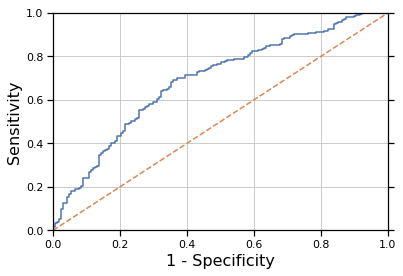

0.6893302731712369


In [108]:
classification.Roc(lr.model, 'predict_proba').plot(x, y)